In [28]:
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from dops import *
warnings.filterwarnings('ignore')

In [2]:
with open('./Data/states_bpleq65.p','rb') as f:
    states = pickle.load(f)

In [7]:
patient_ids = list(states.keys())

In [8]:
pid = patient_ids[0]
df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                        'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                        'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                        'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                        'urine_ind','wbc_ind'])]

df_clean.insert(0,'ICU_ID',pid)
df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
df_y_train = df_clean[['sofa','oasis','saps']]

x_train = df_x_train.iloc[0]
y_train = df_y_train.iloc[0]


for pid in patient_ids[1:]:
    df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                            'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                            'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                            'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                            'urine_ind','wbc_ind'])]
    
    df_clean.insert(0,'ICU_ID',pid)
    df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
    df_y_train = df_clean[['sofa','oasis','saps']]
    
    x_train = pd.concat([x_train,df_x_train.iloc[0]],axis=1)
    y_train = pd.concat([y_train,df_y_train.iloc[0]],axis=1)

In [9]:
x_train = x_train.T.reset_index(drop=True)
y_train = y_train.T.reset_index(drop=True)

In [10]:
corr_df = x_train.drop(['ICU_ID'],axis=1)
corr = corr_df.corr()

In [11]:
corr

,age,is_F,weight,surg_ICU,is_not_white,is_emergency,is_urgent,hrs_from_admit_to_icu,bicarbonate,bun,...,magnesium,meanbp,platelets,potassium,sodium,spo2,spontaneousrr,temp,urine,wbc
age,1.000000,0.109126,-0.187078,-0.073283,-0.088023,0.057241,-0.003368,-0.044161,0.032949,0.136856,...,0.004366,-0.031428,-0.005977,0.047130,0.042847,-0.000135,0.015986,-0.032004,-0.017073,-0.008254
is_F,0.109126,1.000000,-0.259883,-0.065285,0.016332,0.033321,0.006128,-0.027789,-0.011121,-0.057222,...,-0.020733,-0.016264,0.088267,-0.113056,0.014797,-0.004342,0.005248,-0.034222,-0.000495,0.012152
weight,-0.187078,-0.259883,1.000000,0.009041,-0.009096,-0.047079,0.011968,0.005540,0.049432,0.017612,...,0.007538,0.011983,-0.039100,0.057337,-0.007765,-0.034777,0.010274,0.044819,0.015783,0.018920
surg_ICU,-0.073283,-0.065285,0.009041,1.000000,-0.019823,-0.284317,-0.025962,0.016883,0.075643,-0.203550,...,-0.001981,0.018206,-0.013316,0.003580,0.026979,0.087530,-0.073644,0.030297,-0.057513,-0.016113
is_not_white,-0.088023,0.016332,-0.009096,-0.019823,1.000000,0.075226,-0.007769,-0.000554,-0.046291,0.003553,...,-0.000641,0.035192,-0.007403,-0.011931,0.032114,0.027642,0.005859,0.004925,0.000452,0.003059
is_emergency,0.057241,0.033321,-0.047079,-0.284317,0.075226,1.000000,-0.244773,-0.008973,-0.077687,0.088885,...,0.027889,-0.015745,0.101302,-0.084374,0.014624,-0.010731,0.077672,0.032055,0.009719,0.056082
is_urgent,-0.003368,0.006128,0.011968,-0.025962,-0.007769,-0.244773,1.000000,0.012720,-0.011465,0.012321,...,-0.017625,-0.008429,-0.022543,-0.001627,-0.015812,-0.028666,-0.017750,-0.024858,0.026245,-0.003813
hrs_from_admit_to_icu,-0.044161,-0.027789,0.005540,0.016883,-0.000554,-0.008973,0.012720,1.000000,0.040889,0.096752,...,-0.013401,-0.032468,0.011670,0.010775,-0.040034,-0.073669,0.103640,-0.043442,0.049887,-0.022674
bicarbonate,0.032949,-0.011121,0.049432,0.075643,-0.046291,-0.077687,-0.011465,0.040889,1.000000,-0.197945,...,0.028198,0.032539,0.029637,-0.092072,0.115025,-0.013714,-0.038843,0.034983,0.032258,-0.146713
bun,0.136856,-0.057222,0.017612,-0.203550,0.003553,0.088885,0.012321,0.096752,-0.197945,1.000000,...,0.116389,-0.082670,-0.051184,0.282569,-0.009714,-0.043446,0.039095,-0.066756,-0.038508,0.098102


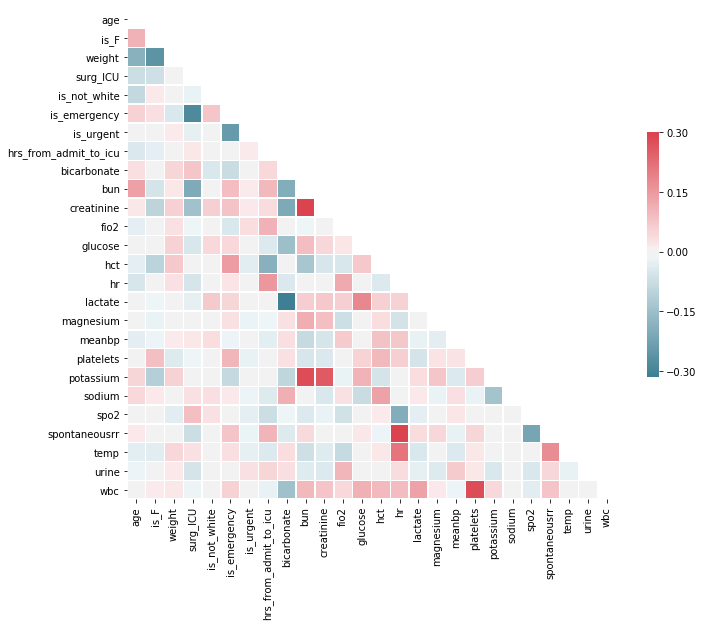

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
coverage = (corr.values > 0.1).astype(int)
coverage

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [16]:
##1's indicate the patient's feature is in bad condition, 0's means feature values in normal

x_train['age'] = np.where(x_train['age']>=60,1,0)
x_train['weight'] = np.where(x_train['weight']>=75,1,0)
x_train['hrs_from_admit_to_icu'] = np.where(x_train['hrs_from_admit_to_icu']>=1,1,0)
x_train['bicarbonate'] = np.where(x_train['bicarbonate']<=20,1,0)
x_train['bun'] = np.where(np.logical_and(x_train['bun']>=7,x_train['bun']<=20),0,1)
x_train['creatinine'] = np.where(np.logical_and(x_train['creatinine']>=0.5,x_train['creatinine']<=1.2),0,1)
x_train['fio2'] = np.where(x_train['fio2']>=0.5,1,0)
x_train['glucose'] = np.where(x_train['glucose']>=125,1,0)
x_train['hct'] = np.where(np.logical_and(x_train['hct']>=37,x_train['hct']<=52),0,1)
x_train['hr'] = np.where(np.logical_and(x_train['hr']>=70,x_train['hr']<=119),0,1)
x_train['lactate'] = np.where(x_train['lactate']>=2,1,0)
x_train['magnesium'] = np.where(np.logical_and(x_train['magnesium']>=1.5,x_train['magnesium']<=2.5),0,1)
x_train['meanbp'] = np.where(x_train['meanbp']<=65,1,0)
x_train['platelets'] = np.where(np.logical_and(x_train['platelets']>=140,x_train['platelets']<=450),0,1)
x_train['potassium'] = np.where(np.logical_and(x_train['potassium']>=3,x_train['potassium']<=4.9),0,1)
x_train['sodium'] = np.where(np.logical_and(x_train['sodium']>=125,x_train['potassium']<=144),0,1)
x_train['spo2'] = np.where(x_train['spo2']<=95,1,0)
x_train['spontaneousrr'] = np.where(np.logical_and(x_train['spontaneousrr']>=12,x_train['spontaneousrr']<=25),0,1)
x_train['temp'] = np.where(x_train['temp']>=39,1,0)
x_train['urine'] = np.where(x_train['urine']<=100,1,0)
x_train['wbc'] = np.where(np.logical_and(x_train['wbc']>=4.3,x_train['wbc']<=10.8),0,1)


In [17]:
df_for_median = x_train.drop(['ICU_ID','is_F','is_not_white','is_emergency','is_urgent','surg_ICU'],axis=1)
median_dict = {}
for column in df_for_median.columns:
    #median_dict[column] = np.median(df_for_median[column].values)
    print(column,np.sum(df_for_median[column].values))
    #print(column)

age 9033
weight 7590
hrs_from_admit_to_icu 6193
bicarbonate 1937
bun 8054
creatinine 3953
fio2 13513
glucose 8093
hct 9578
hr 1308
lactate 3745
magnesium 197
meanbp 925
platelets 2586
potassium 1997
sodium 189
spo2 1303
spontaneousrr 1047
temp 98
urine 12526
wbc 5878


In [18]:
output = pd.concat([x_train,y_train],axis=1)
output.to_csv('synthetic.csv')

In [38]:
manual_coverage = np.array([[1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1],
[0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1],
[1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0],
[1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0],
[1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0],
[1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],
[0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0],
[1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0],
[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0],
[1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1],
[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
[1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0],
[1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0],
[1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
[1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
[1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1]])

In [39]:
x_train = x_train.drop(['ICU_ID'],axis=1)

KeyError: "['ICU_ID'] not found in axis"

Starting DOPS when dropping ['creatinine', 'bicarbonate']
Iter 40, theta: [0.93699788 0.87721997 0.79632792 0.82236934 0.90095573 0.97617119
 0.96434187 0.98521912 1.00958585 0.93888015 0.8074727  0.98521912
 0.91534509 0.97617119 0.98521912 0.86676596 0.77623901 0.76906709
 0.98558046 0.8929655  0.80452249 0.75397161 0.6355343  0.72977541
 0.98521912 0.88486182], gradient: [-0.01554378 -0.01129832 -0.01473081 -0.00896492 -0.01859284 -0.01627238
 -0.01599959 -0.0164232  -0.01769372 -0.01557515 -0.01298373 -0.0164232
 -0.01514503 -0.01627238 -0.0164232  -0.01413317 -0.01192937 -0.01148066
 -0.01674075 -0.01473417 -0.0123033  -0.01029197 -0.00589346 -0.00943567
 -0.0164232  -0.01443483]
Iter 80, theta: [0.9507805  0.89012904 0.80649882 0.83320938 0.91455107 0.99059986
 0.97852866 0.99978153 1.02527483 0.95269059 0.81898533 0.99978153
 0.92877414 0.99059986 0.99978153 0.87929781 0.78681675 0.77924696
 1.00042444 0.90603025 0.81543179 0.76309747 0.64076001 0.73814199
 0.99978153 0.89766114

Iter 80, theta: [0.97393782 0.97998946 0.75211057 0.80387265 0.79859158 0.99026029
 0.99638301 0.99978153 0.97637512 0.96645696 0.90555094 0.99978153
 0.96424248 0.98686093 0.99978153 0.94145933 0.88514723 0.72268605
 0.95650898 0.95415856 0.877894   0.75284137 0.59351646 0.66477595
 0.99978153 0.95676471], gradient: [-0.00023537 -0.00022407 -0.01943083 -0.00016922 -0.00017917 -0.00023989
 -0.00023959 -0.00024275 -0.00023576 -0.00023301 -0.0001941  -0.00024275
 -0.00023701 -0.00023767 -0.00024275 -0.00023037 -0.00018914 -0.00011452
 -0.00023639 -0.00022947 -0.00016781  0.01915607 -0.00010427 -0.00014816
 -0.00024275 -0.0002312 ]
Iter 40, theta: [0.95798259 0.8495766  0.8648128  0.74607433 0.78513217 1.00725339
 0.99929368 0.6959531  0.98521912 0.90191606 0.98521912 0.98521912
 0.78034866 0.91451958 0.85978994 0.84762569 0.92468939 0.86503368
 0.73858749 1.00539726 0.97257884 0.72832371 0.80254212 0.95847747
 1.02122258 0.79028282], gradient: [-0.02823948 -0.00349388 -0.01357769 -0.0165

Iter 40, theta: [0.92290312 0.88708642 0.8596768  0.94095059 0.88518807 0.93335274
 0.98853296 0.75756087 0.98521912 0.93827128 0.98521912 0.98521912
 0.86859534 0.8231361  0.80386597 0.83093232 0.94327645 0.76281424
 0.74856959 0.97998513 1.00783807 0.78602976 0.80159685 0.96861871
 1.00501111 0.8287529 ], gradient: [-0.00851989 -0.01323836 -0.01308779 -0.02135269 -0.00703074 -0.01518394
 -0.01652044 -0.00618938 -0.0164232  -0.01505408 -0.0164232  -0.0164232
 -0.0082648  -0.00674767 -0.0120724  -0.00667531 -0.02226383 -0.00522529
 -0.01161592 -0.03055564 -0.01683805 -0.00548038 -0.01182298 -0.02245044
 -0.01702686 -0.01987931]
Iter 80, theta: [0.9378982  0.89882484 0.87354195 0.95470367 0.89886274 0.9468163
 1.00318159 0.76822926 0.99978153 0.95161969 0.99978153 0.99978153
 0.881104   0.83429952 0.81457053 0.84429183 0.9555772  0.77262778
 0.75660914 0.99445792 1.02276832 0.79606948 0.81208026 0.98334517
 1.02010877 0.83893931], gradient: [-0.01453442 -0.00019567 -0.0203578  -0.006071

Iter 80, theta: [0.97101838 0.89448352 0.90920386 0.89967431 0.82049052 0.97969149
 0.9382379  0.77907636 0.99978153 0.94509281 0.99978153 0.99978153
 0.87131434 0.92820809 0.89686114 0.81636056 0.94401294 0.81507255
 0.95330924 0.90420464 0.97672868 0.8805246  0.82245448 0.9759772
 0.98935732 0.7730483 ], gradient: [-0.01678524 -0.00166053  0.02543693 -0.01597966  0.02758952 -0.01000255
 -0.00021942 -0.00018992 -0.00024275  0.01698526 -0.00024275 -0.00024275
 -0.01677053 -0.01141518 -0.0265241   0.01037687 -0.0002275   0.00048652
  0.01566023  0.00956527 -0.00021184 -0.01145489 -0.00097552 -0.00023697
  0.00121335 -0.00992837]
Used time: 452.61s


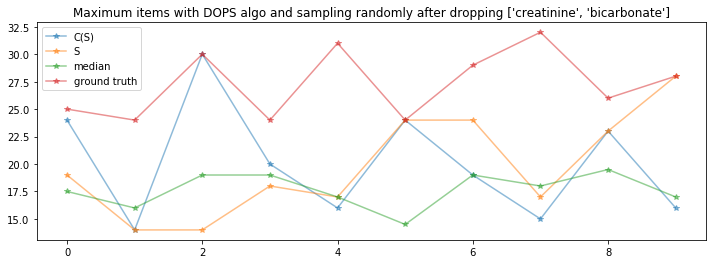

In [37]:
harder_measure = ['lactate','platelets','bun','hct','creatinine','magnesium','potassium','bicarbonate']

# Randomly select 1000 items from the master
measure = ['creatinine','bicarbonate']
print("Starting DOPS when dropping " + str(measure))

preds = []
preds_cover_self = []
truths = []
t1 = time.time()
for i in range(10):
    np.random.seed(i)
    index = np.random.choice(len(x_train), size=1000, replace=False)
    x,y = x_train.iloc[index], y_train.iloc[index]
    x[measure] = 0.0
    x_train_dops = x.values
    y_train_dops = y['saps'].values
    X_train, X_test,Y_train,Y_test = train_test_split(x_train_dops,y_train_dops,test_size=0.02)
    test_len = len(Y_test)
    res1, pred_theta, max_item_index = dops(X_train, Y_train, X_test, coverage, test_len, 0.8, \
                                           np.zeros(26), batch_size=64, eta=0.1, iters=100, print_every=40)
    res2, pred_theta, max_item_index = dops(X_train, Y_train, X_test, np.eye(len(coverage)), test_len, 0.8, \
                                           np.zeros(26), batch_size=64, eta=0.1, iters=100, print_every=40)
    preds.append(res1)
    preds_cover_self.append(res2)
    truths.append(Y_test)

pred = []
pred_cover_self = []
real = []
rand = []
for i in range(10):
    pred.append(truths[i][np.argmax(preds[i])])
    pred_cover_self.append(truths[i][np.argmax(preds_cover_self[i])])
    real.append(max(truths[i]))
    rand.append(np.median(truths[i]))
t2 = time.time()
print('Used time: %.2fs' % (t2-t1))
    
plt.figure(figsize=(12,4))
plt.plot(np.arange(0,10), pred, '*-', alpha=0.5, label='C(S)')
plt.plot(np.arange(0,10), pred_cover_self, '*-', alpha=0.5, label='S')
plt.plot(np.arange(0,10), rand, '*-', alpha=0.5, label='median')
plt.plot(np.arange(0,10), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Maximum items with DOPS algo and sampling randomly after dropping ' + str(measure))
plt.savefig("results after dropping " + str(measure))